# Algoritmos populares de agrupación / Clustering Algorithms

## Visualizando datos de Accidentes

Actualización a 2022

In [1]:
# Dependencies
import pandas as pd
pd.set_option('display.max_columns', 100)
from pandas.plotting import scatter_matrix
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install pip
#!pip install --upgrade seaborn
#!pip install --upgrade numpy

In [3]:
# Opciones de visualizació de cifras:
pd.options.display.float_format = '{:,.2f}'.format #'${:,.2f}'

In [4]:
## Descarga de datos


In [5]:
# Cara renglón en este data set es una persona
# Se eliminaron de tipos de accidente, aquellos que tenian el valor "Certificado cero"

ruta_archivo = "atus_anual_2022_1.csv"

# Lee el archivo CSV en un DataFrame de pandas
datos = pd.read_csv(ruta_archivo)

# Imprime las primeras filas del DataFrame
datos.head()


,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,tipaccid_cod,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,1,3,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2022,1,3,45,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,2,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,1,3,53,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2022,1,4,0,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
3,Municipal,1,1,2022,1,4,15,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,16,0,1,0,2,0,0,0,0,0,0,0,0,2 fatal,Cifras Definitivas
4,Municipal,1,1,2022,1,5,56,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,0,2,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,41,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


In [6]:
#

datos.tail()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,tipaccid_cod,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
289260,Municipal,32,56,2022,12,7,38,30,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,50,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
289261,Municipal,32,56,2022,12,7,45,30,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,1,2,3,31,0,1,0,0,0,0,0,0,0,0,0,0,2 fatal,Cifras Definitivas
289262,Municipal,32,56,2022,12,8,0,30,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
289263,Municipal,32,56,2022,12,14,45,31,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,0,2,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,48,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
289264,Municipal,32,56,2022,12,22,15,31,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con motocicleta,5,0,1,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,2,2,3,27,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


In [7]:
# Número de datos

datos.shape

(289265, 46)

In [8]:
# Nombres de las columnas

datos.columns

Index(['COBERTURA', 'ID_ENTIDAD', 'ID_MUNICIPIO', 'ANIO', 'MES', 'ID_HORA',
       'ID_MINUTO', 'ID_DIA', 'DIASEMANA', 'URBANA', 'SUBURBANA', 'TIPACCID',
       'tipaccid_cod', 'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION',
       'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI',
       'MOTOCICLET', 'BICICLETA', 'OTROVEHIC', 'CAUSAACCI', 'CAPAROD', 'SEXO',
       'ALIENTO', 'CINTURON', 'ID_EDAD', 'CONDMUERTO', 'CONDHERIDO',
       'PASAMUERTO', 'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO', 'CICLMUERTO',
       'CICLHERIDO', 'OTROMUERTO', 'OTROHERIDO', 'NEMUERTO', 'NEHERIDO',
       'CLASACC', 'ESTATUS'],
      dtype='object')

In [9]:
# Tipo de caso que analizaremos y cómo los clasificaremos
# se clasficiaron en accidentes por colisión (con vehículo automotor,con motocicleta,con objeto fijo, 
# con peatón (atropellamiento), con ciclista, con animal,con ferrocarril) y otros accidentes (Volcadura,
# Salida del camion,otro, caída de pasajero, incendio)

datos['TIPACCID'].value_counts()


TIPACCID
Colisión con vehículo automotor          180407
Colisión con motocicleta                  43258
Colisión con objeto fijo                  31832
Volcadura                                  7788
Colisión con peatón (atropellamiento)      7698
Salida del cami2                           7416
Otro                                       4958
Colisión con ciclista                      3227
Caída de pasajero                          1488
Colisión con animal                         808
Colisión con ferrocarril                    206
Incendio                                    179
Name: count, dtype: int64

# Clasificando los casos por tipo de accidente



In [10]:
# Tipo de caso en código que analizaremos (se anexó la variable con el código:
# 1.Caída de pasajero
# 2.Colisión con animal 
# 3.Colisión con ciclista   
# 4.Colisión con ferrocarril 
# 5.Colisión con motocicleta                  
# 6.Colisión con objeto fijo    
# 7.Colisión con peatón (atropellamiento)  
# 8.Colisión con vehículo automotor 
# 9.Incendio   
# 10.Otro
# 11.Salida del cami2
# 12.Volcadura   )                               
    
datos['tipaccid_cod'].value_counts()

tipaccid_cod
8     180407
5      43258
6      31832
12      7788
7       7698
11      7416
10      4958
3       3227
1       1488
2        808
4        206
9        179
Name: count, dtype: int64

In [11]:
## Casos colisión

#* 2 = Colisión con animal 
#* 3 = Colisión con ciclista
#* 4 = Colisión con ferrocarril
#* 5 = Colisión con motocicleta
#* 6 = Colisión con objeto fijo
#* 7 = Colisión con peatón (atropellamiento) 
#* 8 = Colisión con vehículo automotor


In [12]:
# Filtra los datos por la colisión
colision = datos.loc[(datos["tipaccid_cod"].isin([2,3, 4,5,6,7,8]))]

colision.shape

(267436, 46)

In [13]:
## Casos otros accidentes

#* 1 = Caida de pasajero
#* 9 = Incendio
#* 10 = Otro
#* 11 = Salida del camino
#* 12 = Volcadura 


In [14]:
# fILTRA LOS DATOS POR OTRO TIPO DE ACCIDENTE

otros = datos.loc[(datos["tipaccid_cod"].isin([1,9,10, 11, 12]))]

otros.shape


(21829, 46)

In [15]:
## Gráfica - Histograma de accidentes de colisión por sexo, edad, muertos, heridos

In [16]:
# CLAVE DESCRIPCIÓN
# 1 - MUJER
# 2 - HOMBRE

colision['SEXO'].value_counts()

SEXO
2    218662
1     48774
Name: count, dtype: int64

In [17]:
#cantidad de colisiones por edad

colision['ID_EDAD'].value_counts()

ID_EDAD
30    9010
32    8395
28    8304
27    7944
25    7821
      ... 
93      12
91      10
94       6
95       4
98       2
Name: count, Length: 85, dtype: int64

In [18]:
# Colisiones generadas por sexo: Hombre y por edad
columnas_originales = ['COBERTURA', 'ID_ENTIDAD', 'ID_MUNICIPIO', 'ANIO', 'MES', 'ID_HORA', 'ID_MINUTO', 'ID_DIA', 
                       'DIASEMANA', 'URBANA', 'SUBURBANA', 'TIPACCID', 'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION',
                       'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI', 'MOTOCICLET', 'BICICLETA',
                       'OTROVEHIC', 'CAUSAACCI', 'CAPAROD', 'SEXO', 'ALIENTO', 'CINTURON', 'ID_EDAD', 'CONDHERIDO', 
                       'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO', 'CLASACC', 'ESTATUS']
columnas_muertos = ['PASAMUERTO', 'PEATMUERTO', 'CONDMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO']
columnas_heridos = ['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']

# Calcula la suma de las columnas de muertos y asigna el resultado a una nueva columna llamada "muertos"
#datos['muertos'] = datos[columnas_muertos].sum(axis=1)
colision['muertos'] = datos[columnas_muertos].sum(axis=1)

colision['heridos']= datos[columnas_heridos].sum(axis=1)

In [19]:
colision['muertos'].value_counts()

muertos
0     265411
1       1847
2        131
3         29
4         12
6          3
5          2
10         1
Name: count, dtype: int64

In [20]:
colision['heridos'].value_counts()

heridos
0     221277
1      35457
2       7605
3       1837
4        695
5        277
6        107
7         61
8         38
10        19
9         13
13         8
15         8
11         7
12         6
16         4
14         3
22         2
19         2
18         2
26         1
21         1
25         1
31         1
43         1
20         1
23         1
27         1
Name: count, dtype: int64

In [21]:
# Colisiones generadas por sexo: Mujer y por edad
colision[colision['SEXO'] == 1 ]['ID_EDAD']

11        21
13        30
14        35
40        57
43        23
          ..
289242    37
289248    28
289256    25
289259    37
289261    31
Name: ID_EDAD, Length: 48774, dtype: int64

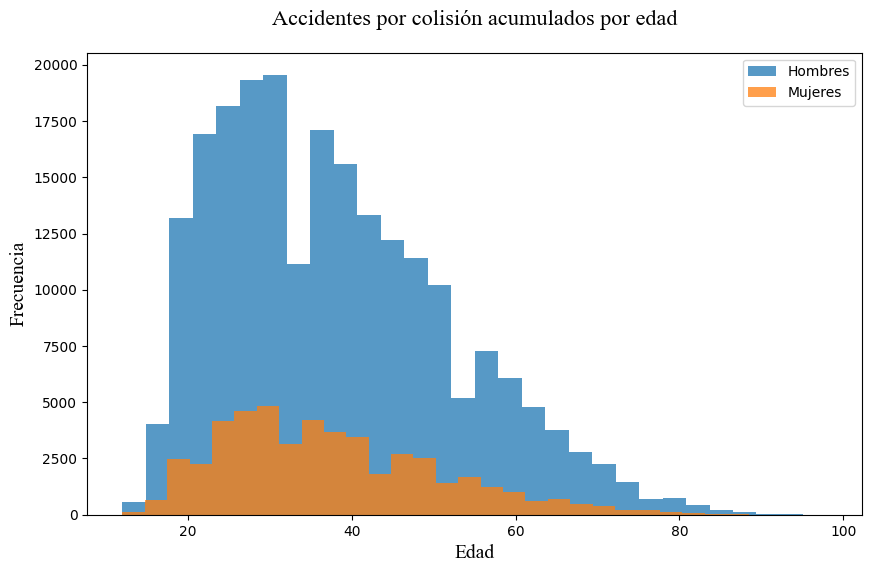

In [22]:
# Histograma:

H = colision[colision['SEXO'] == 2]['ID_EDAD']

M = colision[colision['SEXO'] == 1]['ID_EDAD']


plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(H, bins=30, alpha=0.75, label='Hombres')
plt.hist(M, bins=30, alpha=0.75, label='Mujeres')


# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Accidentes por colisión acumulados por edad', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Edad', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')

plt.show()

In [23]:
# Cantidad de colisiones por día de la semana
# Los días de la semana en la que se presentan la mayor cantidad de accidentes son Sabado, Viernes, Lunes, Jueves

colision["DIASEMANA"].value_counts()

DIASEMANA
Sabado       42184
Viernes      41072
lunes        38179
Jueves       37305
Martes       36906
Miercoles    36546
Domingo      35244
Name: count, dtype: int64

In [24]:
# Cantidad de colisiones por hora

colision["ID_HORA"].value_counts()

ID_HORA
14    18021
15    17581
16    16613
18    16362
19    15922
17    15893
13    15179
8     14866
12    14319
20    14127
9     13728
11    13028
10    12994
21    10942
7     10109
22     9573
0      7845
23     7090
6      5005
1      4724
2      4165
3      3572
4      2982
5      2796
Name: count, dtype: int64

In [25]:
# Cantidad de colisiones el día sabado por hora
colision[colision['DIASEMANA'] == 'Sabado' ]['ID_HORA'].value_counts()

ID_HORA
15    2906
14    2866
16    2619
13    2375
17    2323
20    2311
18    2298
19    2257
12    2237
21    2026
11    2025
22    1990
10    1792
9     1679
23    1624
0     1461
8     1391
7     1025
1     1021
2      998
3      859
6      743
4      720
5      638
Name: count, dtype: int64

In [26]:
# Cantidad de colisiones el día Viernes por hora
colision[colision['DIASEMANA'] == 'Viernes' ]['ID_HORA'].value_counts()

ID_HORA
14    2750
15    2707
17    2589
18    2584
16    2557
19    2538
13    2326
8     2299
20    2267
12    2200
9     2183
11    1989
10    1972
21    1759
22    1565
7     1505
23    1253
0     1063
6      693
1      604
2      502
3      432
5      374
4      361
Name: count, dtype: int64

In [27]:
# Cantidad de colisiones el día Lunes por hora
colision[colision['DIASEMANA'] == 'Lunes' ]['ID_HORA'].value_counts()

Series([], Name: count, dtype: int64)

In [28]:
# Cantidad de colisiones el día Jueves por hora
colision[colision['DIASEMANA'] == 'Jueves' ]['ID_HORA'].value_counts()

ID_HORA
14    2566
15    2523
8     2487
18    2423
16    2383
19    2241
13    2201
9     2187
17    2181
12    2070
10    1969
20    1953
11    1918
7     1570
21    1462
22    1197
0      925
23     854
6      640
1      425
2      341
5      270
3      269
4      250
Name: count, dtype: int64

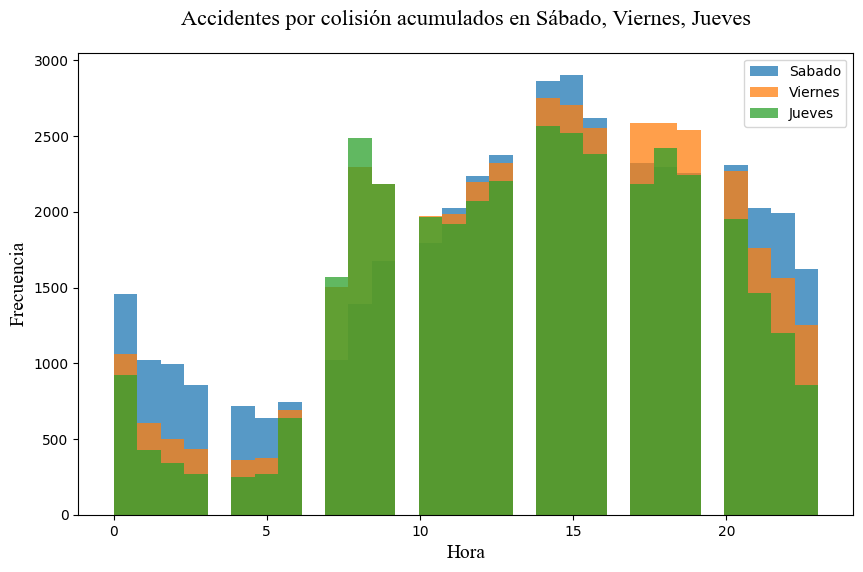

In [29]:
# Histograma: Se observa que la mayor incidencia de accidentes por colisión en los días sabado, viernes y jueves,
# se da alrededor de las 15.00 horas.

S = colision[colision['DIASEMANA'] == 'Sabado' ]['ID_HORA']
V = colision[colision['DIASEMANA'] == 'Viernes' ]['ID_HORA']
#L = colision[colision['DIASEMANA'] == 'Lunes' ]['ID_HORA'].value_counts()
J = colision[colision['DIASEMANA'] == 'Jueves' ]['ID_HORA']

plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(S, bins=30, alpha=0.75, label='Sabado')
plt.hist(V, bins=30, alpha=0.75, label='Viernes')
#plt.hist(L, bins=30, alpha=0.75, label='Lunes')
plt.hist(J, bins=30, alpha=0.75, label='Jueves')

# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Accidentes por colisión acumulados en Sábado, Viernes, Jueves', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Hora', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')

plt.show()

In [30]:
colision[colision['ALIENTO'] == 2]['DIASEMANA']

2          Sabado
3          Sabado
4          Sabado
7          Sabado
8          Sabado
           ...   
289260    Viernes
289261    Viernes
289262    Viernes
289263     Sabado
289264     Sabado
Name: DIASEMANA, Length: 199745, dtype: object

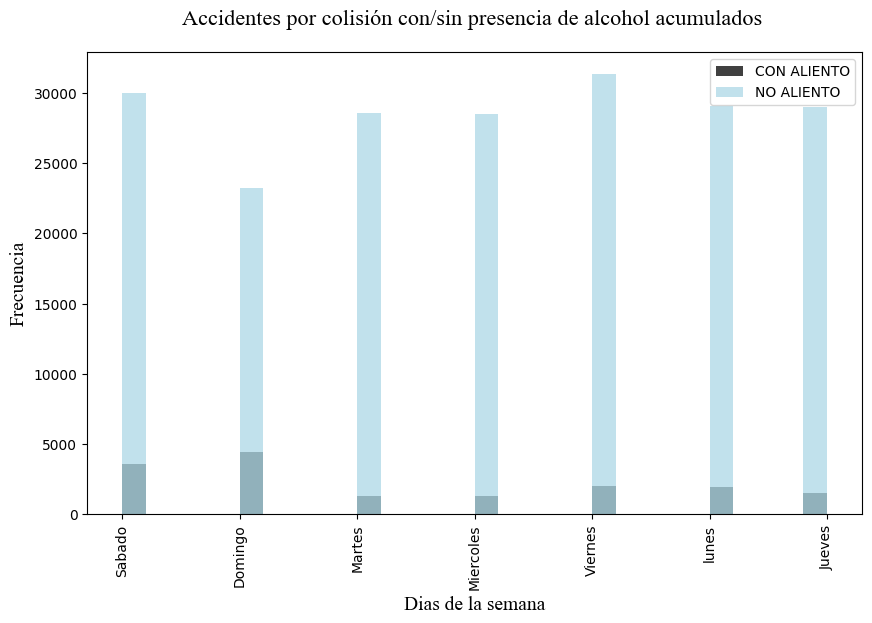

In [31]:
# Histograma de colisiones con/sin presencia de alcohol por día de la semana. Se eliminaron los registros etiquetados
# como "NO se sabe":

AA = colision[colision['ALIENTO'] == 1]['DIASEMANA']
NA = colision[colision['ALIENTO'] == 2]['DIASEMANA']
#NS = colision[colision['ALIENTO'] == 3]['DIASEMANA']

plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(AA, bins=30, alpha=0.75, label='CON ALIENTO',color='black')
plt.hist(NA, bins=30, alpha=0.75, label='NO ALIENTO',color='lightblue')
#plt.hist(SA, bins=30, alpha=0.75, label='NO SE SABE')

# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Accidentes por colisión con/sin presencia de alcohol acumulados ', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Dias de la semana', fontsize=14, fontname='Times New Roman')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')


plt.show()


## Accidentes por colisión



In [32]:
## Gráfica - Histograma colisión con/sin aliento por edad

In [33]:
colision[colision['ALIENTO'] == 2 ]['heridos']

2         0
3         3
4         0
7         0
8         0
         ..
289260    0
289261    1
289262    0
289263    0
289264    0
Name: heridos, Length: 199745, dtype: int64

In [34]:
colision[colision['ALIENTO'] == 2 ]['muertos']

2         0
3         0
4         0
7         0
8         0
         ..
289260    0
289261    0
289262    0
289263    0
289264    0
Name: muertos, Length: 199745, dtype: int64

In [35]:
# CLAVE	DESCRIPCIÓN ALIENTO EN ACCIDENTE POR COLISIÓN Y POR EDAD
# 1 - Si
# 2 - NO
# 3- Se ignora

colision[colision['ALIENTO'] == 1 ]['ID_EDAD']


0         20
1         53
5         32
9         55
15        24
          ..
289228    23
289230    39
289235    21
289242    37
289257    38
Name: ID_EDAD, Length: 15997, dtype: int64

In [36]:
colision[colision['ALIENTO'] == 1 ]['ID_EDAD']

0         20
1         53
5         32
9         55
15        24
          ..
289228    23
289230    39
289235    21
289242    37
289257    38
Name: ID_EDAD, Length: 15997, dtype: int64

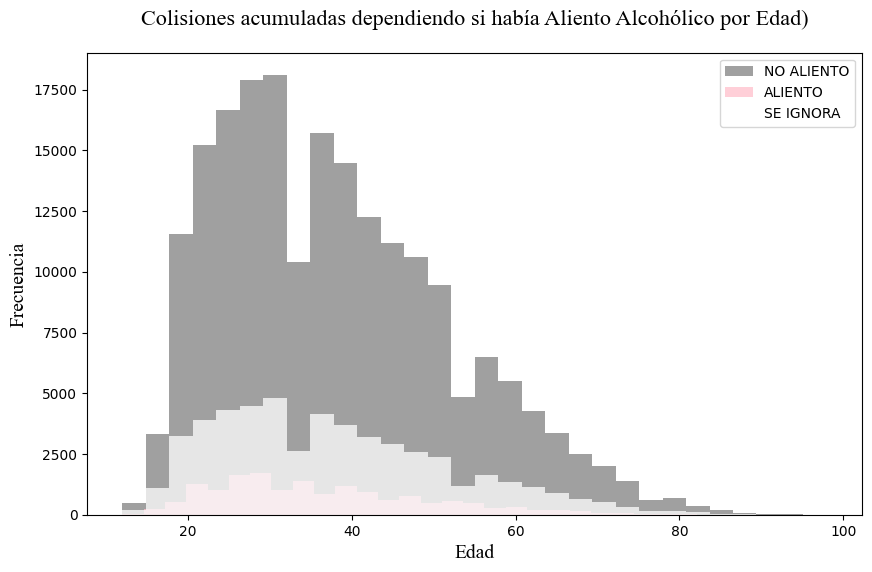

In [37]:
# Histograma:

AA = colision[colision['ALIENTO'] == 1 ]['ID_EDAD']

A = colision[colision['ALIENTO'] == 2 ]['ID_EDAD']
SA=colision[colision['ALIENTO'] == 3 ]['ID_EDAD']

plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(A, bins=30, alpha=0.75, label='NO ALIENTO',color='grey')
plt.hist(AA, bins=30, alpha=0.75, label='ALIENTO', color='pink')
plt.hist(SA, bins=30, alpha=0.75, label='SE IGNORA',color='white')

# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Colisiones acumuladas dependiendo si había Aliento Alcohólico por Edad)', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Edad', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')

plt.show()

In [38]:
# se consideraran los tipos de colisiones maores a 3000 incidencias, por lo que no se consideran los tipos 2 y 4,
# 2 = Colisión con animal y 4= Colision con ferrocarril
colision["tipaccid_cod"].value_counts()

tipaccid_cod
8    180407
5     43258
6     31832
7      7698
3      3227
2       808
4       206
Name: count, dtype: int64

In [39]:
# Todos los días de la semana se van a considerar.
colision["DIASEMANA"].value_counts()

DIASEMANA
Sabado       42184
Viernes      41072
lunes        38179
Jueves       37305
Martes       36906
Miercoles    36546
Domingo      35244
Name: count, dtype: int64

In [40]:
# Colisiones con mayor cantidad de incidencias

#* 3 = Colisión con ciclista
#* 5 = Colisión con motocicleta
#* 6 = Colisión con objeto fijo
#* 7 = Colisión con peatón (atropellamiento) 
#* 8 = Colisión con vehículo automotor

Colision_dia = colision[ ( colision["tipaccid_cod"].isin( [8,5,6,7,3] ) ) & ( colision['DIASEMANA'] ) ]
Colision_dia.shape 

(266422, 48)

In [41]:
# Agrupamiento de colisiones seleccionadas por sexo. Se observa que los hombres participan más en accidentes 
# por colisión
# 1 - MUJER
# 2 - HOMBRE

Colision_dia['SEXO'].value_counts()


SEXO
2    217779
1     48643
Name: count, dtype: int64

In [42]:
Colision_dia[Colision_dia['SEXO'] == 2]['ID_EDAD']

0         20
1         53
2         23
3         16
4         41
          ..
289258    56
289260    50
289262    35
289263    48
289264    27
Name: ID_EDAD, Length: 217779, dtype: int64

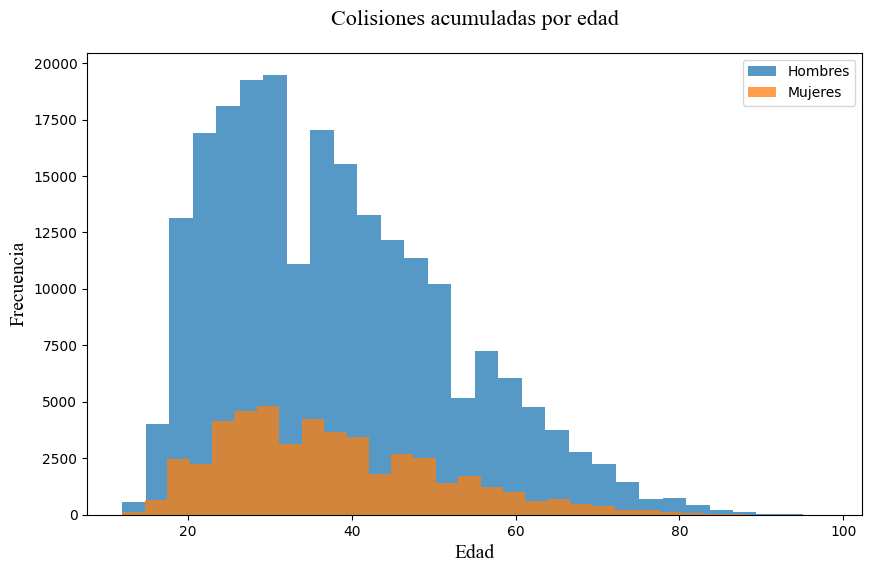

In [43]:
# Histograma: Se observa que la mayor incidencia por grupo etario es en fines de los 20´s y los 30´s, tanto en
# hombres (mayor incidencia) como en mujeres

H = Colision_dia[(Colision_dia['SEXO'] == 2) ]['ID_EDAD']

M = Colision_dia[(Colision_dia['SEXO'] == 1) ]['ID_EDAD']

plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(H, bins=30, alpha=0.75, label='Hombres')
plt.hist(M, bins=30, alpha=0.75, label='Mujeres')

# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Colisiones acumuladas por edad', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Edad', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')

plt.show()

In [44]:
##Series de colisiones por fechas


In [45]:
# Agrupando por dias de la semana: 

Grupo_dia_semana = Colision_dia.groupby("DIASEMANA")
Serie_colision = Grupo_dia_semana.size().to_frame("Colision_dia").reset_index()
#Serie_colision["Colision"] = Serie_Colision["DIASEMANA"].map(str)
Serie_colision.head()

,DIASEMANA,Colision_dia
0,Domingo,35077
1,Jueves,37167
2,Martes,36773
3,Miercoles,36432
4,Sabado,42030


In [46]:
Serie_colision.tail()

,DIASEMANA,Colision_dia
2,Martes,36773
3,Miercoles,36432
4,Sabado,42030
5,Viernes,40897
6,lunes,38046


In [47]:
#series de muertes por fecha de mayor incidencia en colisiones de mayor ocurrencia

In [48]:
# Agrupando por dia de la semana a los muertos: 

Grupo_muertos_dia = Colision_dia.groupby("DIASEMANA")["muertos"].sum()
Serie_muertos = Grupo_muertos_dia.to_frame("Muertos").reset_index()
Serie_muertos["DIASEMANA"] = Serie_muertos["DIASEMANA"].astype(str)

Serie_muertos.head()

,DIASEMANA,Muertos
0,Domingo,444
1,Jueves,255
2,Martes,231
3,Miercoles,265
4,Sabado,429


In [49]:
Serie_muertos.tail()

,DIASEMANA,Muertos
2,Martes,231
3,Miercoles,265
4,Sabado,429
5,Viernes,306
6,lunes,305


In [50]:
##Series  accidentes por fecha, los de mayor incidencia registrada

In [51]:
#NOTA: ESTA SERIE NO SE TOMA PARA EL GRÁFICO, SOLO LAS COLISIONES MUERTE Y HERIDOS

# Agrupando por dia de la semana a los heridos: 

Grupo_heridos_dia = Colision_dia.groupby("DIASEMANA")['heridos'].sum()
Serie_heridos = Grupo_heridos_dia.to_frame("Heridos").reset_index()
Serie_heridos["DIASEMANA"] = Serie_heridos["DIASEMANA"].astype(str)

Serie_heridos.head()

,DIASEMANA,Heridos
0,Domingo,10163
1,Jueves,8384
2,Martes,8178
3,Miercoles,7866
4,Sabado,10250


In [52]:
Serie_heridos.tail()

,DIASEMANA,Heridos
2,Martes,8178
3,Miercoles,7866
4,Sabado,10250
5,Viernes,9088
6,lunes,8514


In [53]:
## Graficando

In [54]:
# Preparamos DataFrame's

colision_d = Serie_colision[['DIASEMANA','Colision_dia' ]] 
muertos_d = Serie_muertos[['DIASEMANA','Muertos']]
heridos_d = Serie_heridos[['DIASEMANA','Heridos']] 



In [55]:
# Unimos las series: 
Series_Casos = pd.merge(colision_d, muertos_d, how = 'outer', on = 'DIASEMANA')
Series_Casos = Series_Casos.rename(columns = {'Colision_dia': 'Colision'})
Series_Casos = pd.merge(Series_Casos,heridos_d, how = 'outer', on = 'DIASEMANA')

Series_Casos.head()


,DIASEMANA,Colision,Muertos,Heridos
0,Domingo,35077,444,10163
1,Jueves,37167,255,8384
2,Martes,36773,231,8178
3,Miercoles,36432,265,7866
4,Sabado,42030,429,10250


In [56]:
Series_Casos.tail()

,DIASEMANA,Colision,Muertos,Heridos
2,Martes,36773,231,8178
3,Miercoles,36432,265,7866
4,Sabado,42030,429,10250
5,Viernes,40897,306,9088
6,lunes,38046,305,8514


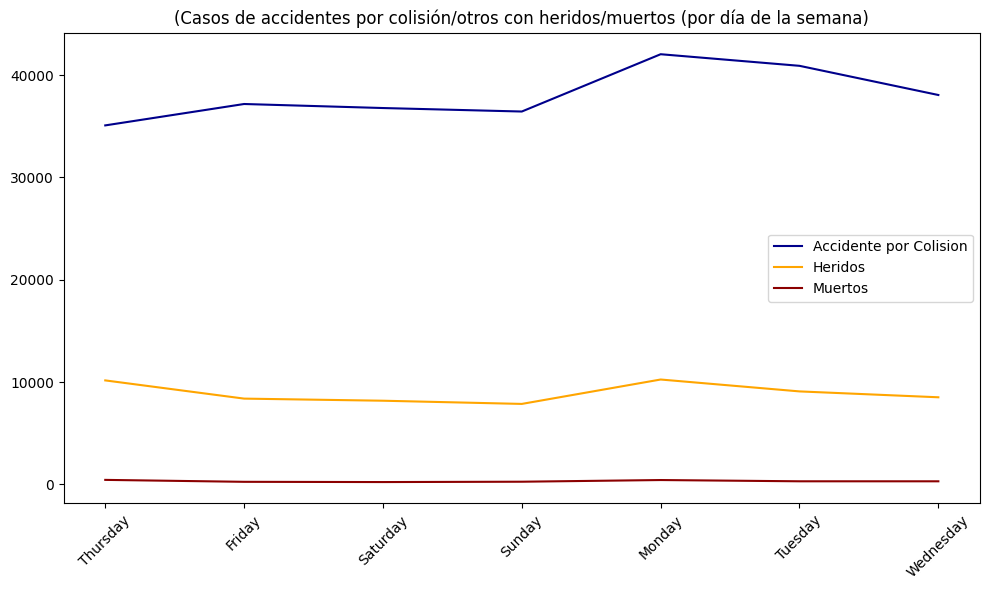

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['DIASEMANA'], Series_Casos['Colision'], label='Accidente por Colision', color='darkblue')
plt.plot(Series_Casos['DIASEMANA'], Series_Casos['Heridos'], label='Heridos', color='orange')
plt.plot(Series_Casos['DIASEMANA'], Series_Casos['Muertos'], label='Muertos', color='darkred')
#plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Muer'], label='Defunciones por fecha de muerte', color='darkgreen')

# Configura el título y las leyendas
plt.title('(Casos de accidentes por colisión/otros con heridos/muertos (por día de la semana)')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%A'))
plt.xticks(rotation=45)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

In [58]:
#Resultados a archivo CSV:
Series_Casos.to_csv('Series_Casos.csv',index=False,encoding='utf-8-sig')

## Algoritmos de agrupamiento (clustering)

Sabemos que los algoritmos pertenecientes a la familia del Aprendizaje No Supervisado no tienen ninguna variable que predecir ligada a los datos. En lugar de tener una salida, los datos solo tienen una entrada que serían múltiples variables que describen los datos. Aquí es donde entra en juego la agrupación.

Clustering es la tarea de agrupar un conjunto de objetos de manera que los objetos del mismo grupo sean más similares entre sí que a los objetos de otros grupos. La similitud es una métrica que refleja la fuerza de la relación entre dos objetos de datos. 

La agrupación en clústeres se utiliza principalmente (pero no exclusivamente) para la exploración de datos. Tiene múltiples usos en muchos campos, como el machine learning, el reconocimiento de patrones, el análisis de imágenes, la recuperación de información, la bioinformática, la compresión de datos y los gráficos por computadora.

Hacemos un repaso de esas técnicas.

### K-medias

Existen muchos modelos de agrupación. Revisaremos los más populares. A pesar de su simplicidad, K-means se utiliza ampliamente para la agrupación en clústeres en muchas aplicaciones de ciencia de datos, lo que es especialmente útil si necesita descubrir rápidamente información a partir de datos sin etiquetar. En este notebook, vemos cómo utilizar k-Means para la segmentación de casos.

In [59]:
#

colisiones_KM = colision.loc[(datos["tipaccid_cod"].isin([8,5,6,7,3]))]

colisiones_KM.shape

(266422, 48)

In [60]:
colisiones_KM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266422 entries, 0 to 289264
Data columns (total 48 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   COBERTURA     266422 non-null  object
 1   ID_ENTIDAD    266422 non-null  int64 
 2   ID_MUNICIPIO  266422 non-null  int64 
 3   ANIO          266422 non-null  int64 
 4   MES           266422 non-null  int64 
 5   ID_HORA       266422 non-null  int64 
 6   ID_MINUTO     266422 non-null  int64 
 7   ID_DIA        266422 non-null  int64 
 8   DIASEMANA     266422 non-null  object
 9   URBANA        266422 non-null  object
 10  SUBURBANA     266422 non-null  object
 11  TIPACCID      266422 non-null  object
 12  tipaccid_cod  266422 non-null  int64 
 13  AUTOMOVIL     266422 non-null  int64 
 14  CAMPASAJ      266422 non-null  int64 
 15  MICROBUS      266422 non-null  int64 
 16  PASCAMION     266422 non-null  int64 
 17  OMNIBUS       266422 non-null  int64 
 18  TRANVIA       266422 non-null

In [61]:
#

colisiones_KM.tail()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,tipaccid_cod,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,muertos,heridos
289260,Municipal,32,56,2022,12,7,38,30,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,50,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
289261,Municipal,32,56,2022,12,7,45,30,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,1,2,3,31,0,1,0,0,0,0,0,0,0,0,0,0,2 fatal,Cifras Definitivas,0,1
289262,Municipal,32,56,2022,12,8,0,30,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
289263,Municipal,32,56,2022,12,14,45,31,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,0,2,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,48,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
289264,Municipal,32,56,2022,12,22,15,31,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con motocicleta,5,0,1,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,2,2,3,27,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0


In [62]:
# Las variables relevantes de la tabla:
#  'ID_ENTIDAD', 'ID_MUNICIPIO', 'SEXO', 'EDAD', 'TIPACCID, 
# 'ID_HORA', 'DIASEMANA', 'MES'
# 'ALIENTO', 'muertos', 'heridos'

colisiones_KM.head()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,tipaccid_cod,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,muertos,heridos
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,1,3,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
1,Municipal,1,1,2022,1,3,45,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,2,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,1,3,53,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
2,Municipal,1,1,2022,1,4,0,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
3,Municipal,1,1,2022,1,4,15,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,16,0,1,0,2,0,0,0,0,0,0,0,0,2 fatal,Cifras Definitivas,0,3
4,Municipal,1,1,2022,1,5,56,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,0,2,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,41,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0


In [63]:
# 

colisiones_KM.ID_ENTIDAD.value_counts(normalize=True)

ID_ENTIDAD
19   0.20
26   0.08
8    0.07
15   0.05
11   0.04
16   0.04
5    0.04
14   0.04
28   0.04
30   0.03
21   0.03
10   0.03
22   0.03
2    0.03
31   0.03
17   0.03
24   0.02
23   0.02
9    0.02
25   0.02
3    0.02
6    0.01
1    0.01
20   0.01
4    0.01
12   0.01
13   0.01
32   0.01
18   0.01
29   0.00
7    0.00
27   0.00
Name: proportion, dtype: float64

In [64]:


colisiones_KM.ID_MUNICIPIO.value_counts(normalize=True)

ID_MUNICIPIO
39    0.08
19    0.05
5     0.05
30    0.04
46    0.04
      ... 
149   0.00
427   0.00
413   0.00
117   0.00
209   0.00
Name: proportion, Length: 242, dtype: float64

In [65]:
# 

colisiones_KM.SEXO.value_counts(normalize = True)

SEXO
2   0.82
1   0.18
Name: proportion, dtype: float64

In [66]:
# 

colisiones_KM.ID_EDAD.value_counts(normalize = True)

ID_EDAD
30   0.03
32   0.03
28   0.03
27   0.03
25   0.03
     ... 
93   0.00
91   0.00
94   0.00
95   0.00
98   0.00
Name: proportion, Length: 85, dtype: float64

In [67]:
#

colisiones_KM.tipaccid_cod.value_counts(normalize = True)



tipaccid_cod
8   0.68
5   0.16
6   0.12
7   0.03
3   0.01
Name: proportion, dtype: float64

In [68]:

# 
colisiones_KM.ID_DIA.value_counts(normalize = True)

ID_DIA
1    0.04
15   0.03
14   0.03
5    0.03
9    0.03
22   0.03
17   0.03
4    0.03
19   0.03
16   0.03
12   0.03
10   0.03
18   0.03
11   0.03
3    0.03
8    0.03
26   0.03
23   0.03
13   0.03
20   0.03
6    0.03
2    0.03
7    0.03
28   0.03
25   0.03
27   0.03
24   0.03
21   0.03
30   0.03
29   0.03
31   0.02
Name: proportion, dtype: float64

In [69]:
# 

colisiones_KM.DIASEMANA.value_counts(normalize = True)

DIASEMANA
Sabado      0.16
Viernes     0.15
lunes       0.14
Jueves      0.14
Martes      0.14
Miercoles   0.14
Domingo     0.13
Name: proportion, dtype: float64

In [70]:
# 

colisiones_KM.MES.value_counts(normalize = True)

MES
5    0.09
12   0.09
10   0.09
3    0.09
7    0.09
6    0.08
11   0.08
8    0.08
4    0.08
9    0.08
2    0.08
1    0.07
Name: proportion, dtype: float64

In [71]:
#  1= Si aliento
# 2 = No Aliento
# 3= se fugó

colisiones_KM.ALIENTO.value_counts(normalize = True)

ALIENTO
2   0.75
3   0.19
1   0.06
Name: proportion, dtype: float64

In [72]:
# 

colisiones_KM.muertos.value_counts(normalize = True)

muertos
0    0.99
1    0.01
2    0.00
3    0.00
4    0.00
6    0.00
5    0.00
10   0.00
Name: proportion, dtype: float64

In [73]:
# 

colisiones_KM.heridos.value_counts(normalize = True)

heridos
0    0.83
1    0.13
2    0.03
3    0.01
4    0.00
5    0.00
6    0.00
7    0.00
8    0.00
10   0.00
9    0.00
13   0.00
11   0.00
15   0.00
12   0.00
16   0.00
14   0.00
22   0.00
19   0.00
26   0.00
21   0.00
18   0.00
25   0.00
31   0.00
43   0.00
20   0.00
23   0.00
27   0.00
Name: proportion, dtype: float64

In [74]:
# Let's see our data in a detailed way with pairplot

#sns.pairplot( colisiones_KM[ [ 'SEXO','ID_EDAD', 'ALIENTO'] ] , hue = 'SEXO' )

#plt.show()

In [75]:
# Let's see our data in a detailed way with pairplot

#sns.pairplot( colisiones_KM[ [ 'MES','DIASEMANA', 'tipaccid_cod'] ] , hue = 'MES' )

#plt.show()

In [76]:
#sns.pairplot( colisiones_KM[ [ 'MES','DIASEMANA', 'tipaccid_cod', 'SEXO'] ] , hue = 'DIASEMANA' )

#plt.show()

In [77]:
#De los gráficos anteriores vemos que el género y otras variables no parecen tener relación directa 
#con la segmentación de defunciones. Es por eso que podemos dejarlo y continuar con otras características,
#razón por la cual usaremos el parámetro X de ahora en adelante.

In [78]:
#colisiones_KM.info()

In [79]:
D1 =colisiones_KM

In [80]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266422 entries, 0 to 289264
Data columns (total 48 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   COBERTURA     266422 non-null  object
 1   ID_ENTIDAD    266422 non-null  int64 
 2   ID_MUNICIPIO  266422 non-null  int64 
 3   ANIO          266422 non-null  int64 
 4   MES           266422 non-null  int64 
 5   ID_HORA       266422 non-null  int64 
 6   ID_MINUTO     266422 non-null  int64 
 7   ID_DIA        266422 non-null  int64 
 8   DIASEMANA     266422 non-null  object
 9   URBANA        266422 non-null  object
 10  SUBURBANA     266422 non-null  object
 11  TIPACCID      266422 non-null  object
 12  tipaccid_cod  266422 non-null  int64 
 13  AUTOMOVIL     266422 non-null  int64 
 14  CAMPASAJ      266422 non-null  int64 
 15  MICROBUS      266422 non-null  int64 
 16  PASCAMION     266422 non-null  int64 
 17  OMNIBUS       266422 non-null  int64 
 18  TRANVIA       266422 non-null

In [81]:
D1.head()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,tipaccid_cod,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,muertos,heridos
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,1,3,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
1,Municipal,1,1,2022,1,3,45,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,2,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,1,3,53,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
2,Municipal,1,1,2022,1,4,0,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
3,Municipal,1,1,2022,1,4,15,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,16,0,1,0,2,0,0,0,0,0,0,0,0,2 fatal,Cifras Definitivas,0,3
4,Municipal,1,1,2022,1,5,56,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,0,2,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,41,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0


In [82]:
#D1_dummies = pd.get_dummies(D1, columns=['ID_ENTIDAD','MES', 'tipaccid_cod', #'ID_EDAD',  
#                                         'ALIENTO', 'DIASEMANA_COD']) #'SEXO'

D1_dummies = pd.get_dummies(D1[['ID_ENTIDAD','MES', 'tipaccid_cod', 'ALIENTO', 'DIASEMANA']], 
                            columns = ['ID_ENTIDAD','MES', 'tipaccid_cod', 'ALIENTO', 'DIASEMANA'],
                            dtype=float)
                                         
D1_dummies

,ID_ENTIDAD_1,ID_ENTIDAD_2,ID_ENTIDAD_3,ID_ENTIDAD_4,ID_ENTIDAD_5,ID_ENTIDAD_6,ID_ENTIDAD_7,ID_ENTIDAD_8,ID_ENTIDAD_9,ID_ENTIDAD_10,ID_ENTIDAD_11,ID_ENTIDAD_12,ID_ENTIDAD_13,ID_ENTIDAD_14,ID_ENTIDAD_15,ID_ENTIDAD_16,ID_ENTIDAD_17,ID_ENTIDAD_18,ID_ENTIDAD_19,ID_ENTIDAD_20,ID_ENTIDAD_21,ID_ENTIDAD_22,ID_ENTIDAD_23,ID_ENTIDAD_24,ID_ENTIDAD_25,ID_ENTIDAD_26,ID_ENTIDAD_27,ID_ENTIDAD_28,ID_ENTIDAD_29,ID_ENTIDAD_30,ID_ENTIDAD_31,ID_ENTIDAD_32,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,MES_11,MES_12,tipaccid_cod_3,tipaccid_cod_5,tipaccid_cod_6,tipaccid_cod_7,tipaccid_cod_8,ALIENTO_1,ALIENTO_2,ALIENTO_3,DIASEMANA_Domingo,DIASEMANA_Jueves,DIASEMANA_Martes,DIASEMANA_Miercoles,DIASEMANA_Sabado,DIASEMANA_Viernes,DIASEMANA_lunes
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289260,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
289261,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
289262,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
289263,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [83]:
# Combine the original data with the dummy variables
D1_combined = pd.concat([ D1.drop(['ID_ENTIDAD','MES', 'tipaccid_cod', 'ALIENTO',
                                   'COBERTURA', 'DIASEMANA', 'URBANA', 'SUBURBANA', 'TIPACCID', 
                                   'CAUSAACCI', 'CAPAROD', 'CLASACC', 'ESTATUS'], axis = 1),
                          D1_dummies], axis=1)


In [84]:
# Combine the original data with the dummy variables
#D1_combined = pd.concat([D1, D1_dummies], axis=1)
#D1 = D1[ [ 'ID_ENTIDAD', 'MES','ID_EDAD', 'tipaccid_cod','ALIENTO','DIASEMANA_COD','SEXO']]

In [116]:
D1_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266422 entries, 0 to 289264
Data columns (total 95 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_MUNICIPIO         266422 non-null  int64  
 1   ANIO                 266422 non-null  int64  
 2   ID_HORA              266422 non-null  int64  
 3   ID_MINUTO            266422 non-null  int64  
 4   ID_DIA               266422 non-null  int64  
 5   AUTOMOVIL            266422 non-null  int64  
 6   CAMPASAJ             266422 non-null  int64  
 7   MICROBUS             266422 non-null  int64  
 8   PASCAMION            266422 non-null  int64  
 9   OMNIBUS              266422 non-null  int64  
 10  TRANVIA              266422 non-null  int64  
 11  CAMIONETA            266422 non-null  int64  
 12  CAMION               266422 non-null  int64  
 13  TRACTOR              266422 non-null  int64  
 14  FERROCARRI           266422 non-null  int64  
 15  MOTOCICLET           2

In [86]:

#D1 = pd.concat( [ D1, pd.get_dummies( D1['ID_ENTIDAD']) ], axis = 1 )
#D1 = pd.concat( [ D1, pd.get_dummies( D1['MES'])], axis = 1 )
#D1 = pd.concat( [ D1, pd.get_dummies( D1['ID_EDAD']) ], axis = 1 )
#D1 = pd.concat( [ D1, pd.get_dummies( D1['tipaccid_cod']) ], axis = 1 )
#D1 = pd.concat( [ D1, pd.get_dummies( D1['ALIENTO']) ], axis = 1 )
#D1 = pd.concat( [ D1, pd.get_dummies( D1['DIASEMANA_COD']) ], axis = 1 )
#D1 = pd.concat( [ D1, pd.get_dummies( D1['SEXO'])], axis = 1 )

#D1 = D1[ [ 'ID_ENTIDAD', 'MES','ID_EDAD', 'tipaccid_cod','ALIENTO','DIASEMANA_COD','SEXO']]

In [87]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266422 entries, 0 to 289264
Data columns (total 48 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   COBERTURA     266422 non-null  object
 1   ID_ENTIDAD    266422 non-null  int64 
 2   ID_MUNICIPIO  266422 non-null  int64 
 3   ANIO          266422 non-null  int64 
 4   MES           266422 non-null  int64 
 5   ID_HORA       266422 non-null  int64 
 6   ID_MINUTO     266422 non-null  int64 
 7   ID_DIA        266422 non-null  int64 
 8   DIASEMANA     266422 non-null  object
 9   URBANA        266422 non-null  object
 10  SUBURBANA     266422 non-null  object
 11  TIPACCID      266422 non-null  object
 12  tipaccid_cod  266422 non-null  int64 
 13  AUTOMOVIL     266422 non-null  int64 
 14  CAMPASAJ      266422 non-null  int64 
 15  MICROBUS      266422 non-null  int64 
 16  PASCAMION     266422 non-null  int64 
 17  OMNIBUS       266422 non-null  int64 
 18  TRANVIA       266422 non-null

In [97]:

# Crear el objeto KMeans
kmeans = KMeans(n_clusters=1)

# Ajustar el modelo
kmeans.fit(D1_combined)

# Obtener las etiquetas de clúster
labels = kmeans.labels_

# Obtener los centroides de los clústeres
centroides = kmeans.cluster_centers_


In [101]:
km = KMeans(n_clusters=3).fit(D1_combined)

km.inertia_

267261838.2262711

In [98]:
centroides

array([[3.71221446e+01, 2.02200000e+03, 1.33488000e+01, 2.60677346e+01,
        1.55313450e+01, 1.26985009e+00, 1.88651838e-01, 3.98240386e-03,
        3.78084392e-02, 4.99958712e-03, 1.05096426e-04, 1.41035650e-01,
        4.53491078e-02, 3.07894994e-02, 2.28960071e-04, 1.95629490e-01,
        1.34185615e-02, 1.33697668e-02, 1.81742123e+00, 2.55288602e+00,
        3.78319883e+01, 4.50037910e-03, 1.25837956e-01, 1.63650149e-03,
        6.97277252e-02, 1.87672189e-03, 3.10597473e-02, 3.04028947e-04,
        7.01518643e-03, 7.13154319e-05, 7.35674982e-04, 0.00000000e+00,
        0.00000000e+00, 8.38894686e-03, 2.34376290e-01, 1.39327833e-02,
        2.91755185e-02, 1.70293745e-02, 9.87155715e-03, 3.76019998e-02,
        1.49875010e-02, 3.47193550e-03, 6.57340610e-02, 2.27158418e-02,
        3.30453191e-02, 4.37126063e-02, 9.68763841e-03, 9.35358191e-03,
        3.75757257e-02, 4.58896037e-02, 4.26053404e-02, 2.52081285e-02,
        5.90792052e-03, 1.99533072e-01, 1.33359858e-02, 3.310912

In [90]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [108]:
#DEFINIMOS X

X = D1_combined[['ID_ENTIDAD','MES', 'tipaccid_cod', 'ALIENTO',
                 'COBERTURA', 'DIASEMANA', 'URBANA', 'SUBURBANA', 'TIPACCID', 
                 'CAUSAACCI', 'CAPAROD', 'CLASACC', 'ESTATUS']]

NameError: name 'D1_km' is not defined

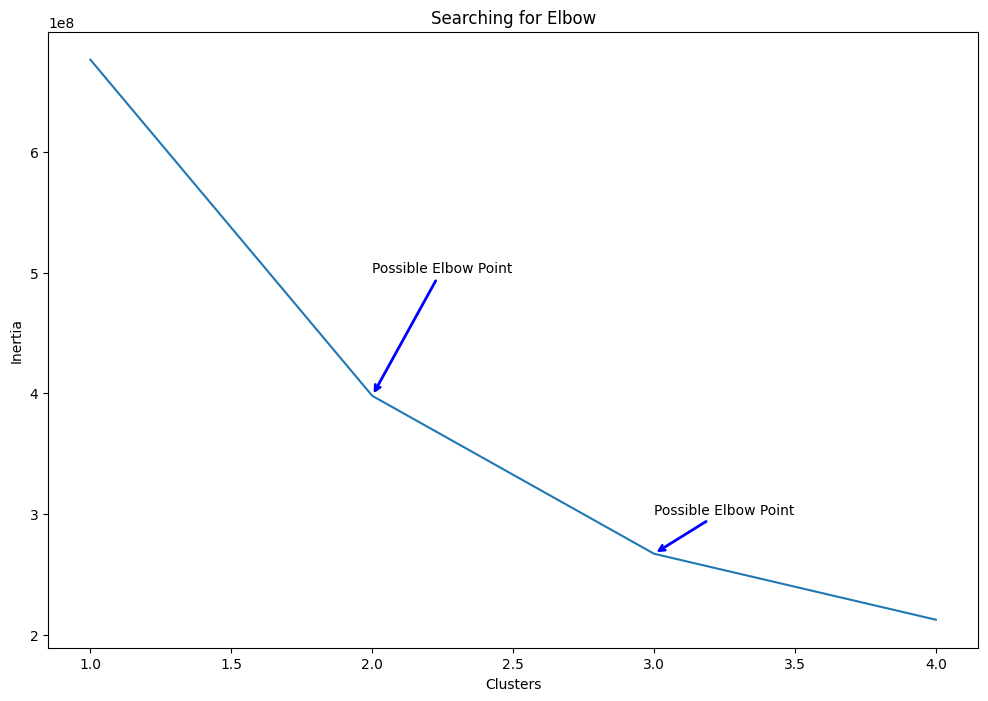

In [104]:
clusters = []

#
for i in range(1, 5):
    km = KMeans( n_clusters = i ).fit( D1_combined ) 
    clusters.append( km.inertia_)

#
fig, ax = plt.subplots( figsize = (12, 8) )
sns.lineplot(x = list(range(1, 5)), y = clusters, ax = ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy = (2, 397997733), xytext = (2, 500000000), xycoords = 'data',          
             arrowprops = dict( arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))

ax.annotate('Possible Elbow Point', xy = (3, 267261838), xytext = (3, 300000000), xycoords = 'data',          
             arrowprops = dict( arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))


plt.show()

In [119]:
D1_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266422 entries, 0 to 289264
Data columns (total 95 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_MUNICIPIO         266422 non-null  int64  
 1   ANIO                 266422 non-null  int64  
 2   ID_HORA              266422 non-null  int64  
 3   ID_MINUTO            266422 non-null  int64  
 4   ID_DIA               266422 non-null  int64  
 5   AUTOMOVIL            266422 non-null  int64  
 6   CAMPASAJ             266422 non-null  int64  
 7   MICROBUS             266422 non-null  int64  
 8   PASCAMION            266422 non-null  int64  
 9   OMNIBUS              266422 non-null  int64  
 10  TRANVIA              266422 non-null  int64  
 11  CAMIONETA            266422 non-null  int64  
 12  CAMION               266422 non-null  int64  
 13  TRACTOR              266422 non-null  int64  
 14  FERROCARRI           266422 non-null  int64  
 15  MOTOCICLET           2

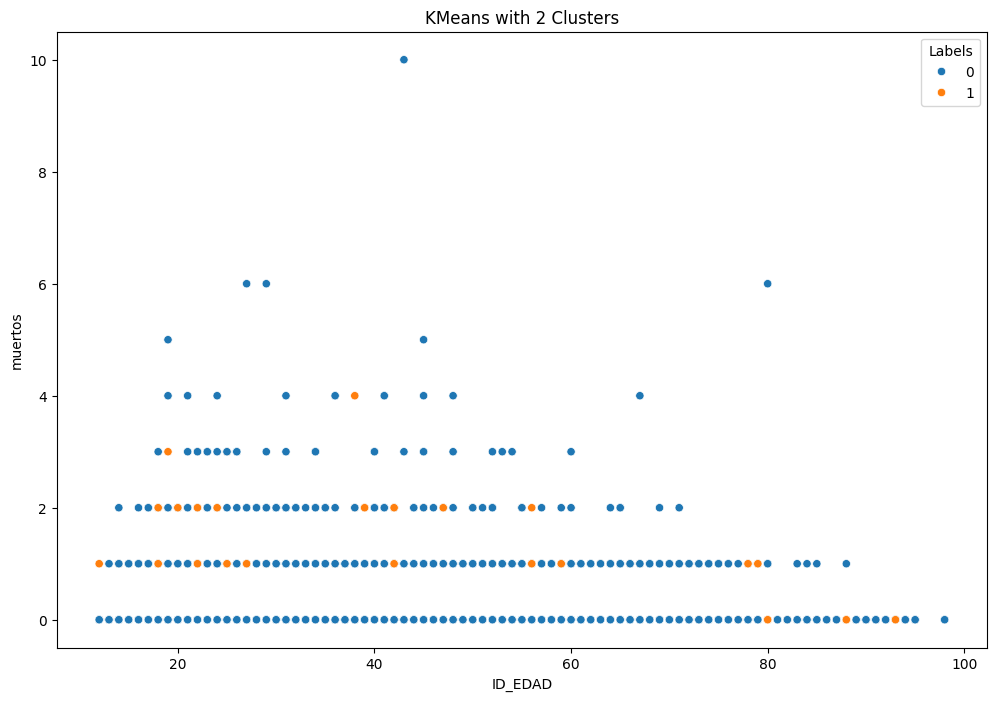

In [128]:
# 2 cluster
km2 = KMeans(n_clusters = 2).fit( D1_combined )

D1_combined['Labels'] = km2.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = D1_combined, x = 'ID_EDAD', y = 'muertos', hue = 'Labels' )

plt.title('KMeans with 2 Clusters')

plt.show()

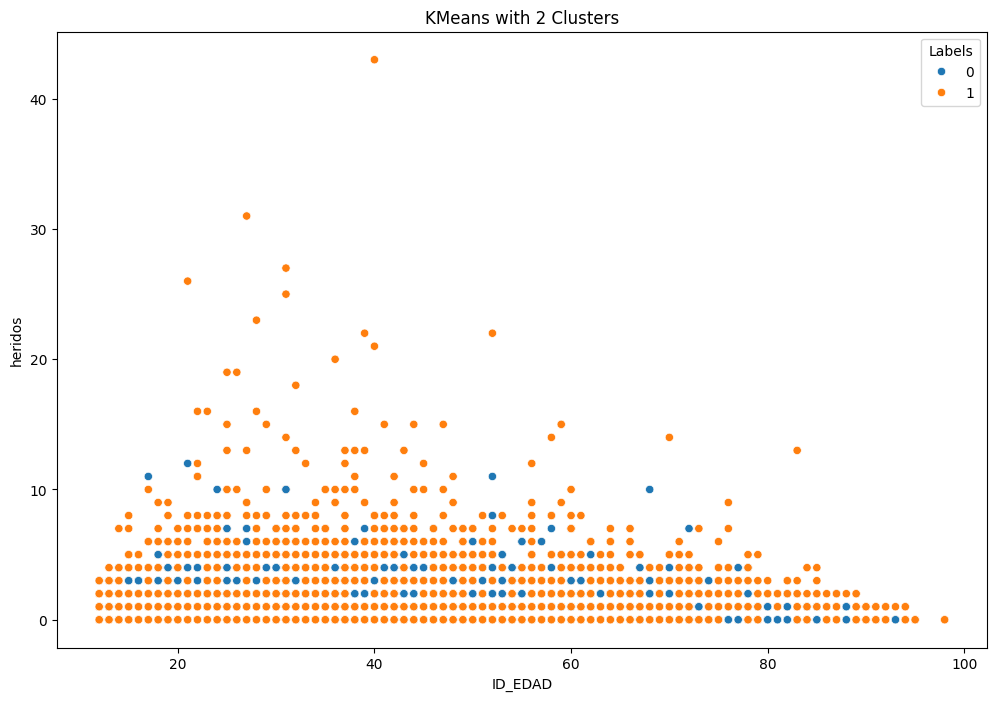

In [127]:
# 2 cluster
km2 = KMeans(n_clusters = 2).fit( D1_combined )

D1_combined['Labels'] = km2.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = D1_combined, x = 'ID_EDAD', y = 'heridos', hue = 'Labels' )

plt.title('KMeans with 2 Clusters')

plt.show()

In [129]:
D1_combined[D1_combined['Labels']==0].describe()

,ID_MUNICIPIO,ANIO,ID_HORA,ID_MINUTO,ID_DIA,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,SEXO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,muertos,heridos,ID_ENTIDAD_1,ID_ENTIDAD_2,ID_ENTIDAD_3,ID_ENTIDAD_4,ID_ENTIDAD_5,ID_ENTIDAD_6,ID_ENTIDAD_7,ID_ENTIDAD_8,ID_ENTIDAD_9,ID_ENTIDAD_10,ID_ENTIDAD_11,ID_ENTIDAD_12,ID_ENTIDAD_13,ID_ENTIDAD_14,ID_ENTIDAD_15,ID_ENTIDAD_16,ID_ENTIDAD_17,ID_ENTIDAD_18,ID_ENTIDAD_19,ID_ENTIDAD_20,ID_ENTIDAD_21,ID_ENTIDAD_22,ID_ENTIDAD_23,ID_ENTIDAD_24,ID_ENTIDAD_25,ID_ENTIDAD_26,ID_ENTIDAD_27,ID_ENTIDAD_28,ID_ENTIDAD_29,ID_ENTIDAD_30,ID_ENTIDAD_31,ID_ENTIDAD_32,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,MES_11,MES_12,tipaccid_cod_3,tipaccid_cod_5,tipaccid_cod_6,tipaccid_cod_7,tipaccid_cod_8,ALIENTO_1,ALIENTO_2,ALIENTO_3,DIASEMANA_Domingo,DIASEMANA_Jueves,DIASEMANA_Martes,DIASEMANA_Miercoles,DIASEMANA_Sabado,DIASEMANA_Viernes,DIASEMANA_lunes,Labels
count,"237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00","237,327.00"
mean,25.81,"2,022.00",13.33,26.08,15.53,1.26,0.20,0.00,0.04,0.01,0.00,0.14,0.05,0.03,0.00,0.19,0.01,0.01,1.81,2.60,37.82,0.00,0.13,0.00,0.07,0.00,0.03,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.23,0.02,0.03,0.02,0.01,0.04,0.02,0.00,0.07,0.03,0.04,0.05,0.01,0.01,0.02,0.03,0.04,0.03,0.01,0.22,0.01,0.01,0.03,0.03,0.03,0.02,0.08,0.00,0.04,0.01,0.01,0.02,0.01,0.07,0.08,0.09,0.08,0.09,0.08,0.09,0.08,0.08,0.09,0.08,0.09,0.01,0.16,0.12,0.03,0.68,0.06,0.75,0.19,0.13,0.14,0.14,0.14,0.16,0.15,0.14,0.00
std,17.28,0.00,5.80,17.68,8.83,0.76,0.45,0.06,0.20,0.07,0.01,0.39,0.22,0.18,0.01,0.42,0.12,0.12,0.39,0.70,14.07,0.07,0.36,0.05,0.44,0.05,0.19,0.02,0.09,0.01,0.03,0.00,0.00,0.11,0.65,0.12,0.18,0.14,0.10,0.20,0.13,0.05,0.26,0.16,0.19,0.22,0.10,0.10,0.15,0.18,0.18,0.17,0.08,0.42,0.09,0.09,0.18,0.16,0.16,0.14,0.28,0.06,0.20,0.07,0.12,0.14,0.09,0.26,0.26,0.28,0.28,0.29,0.28,0.28,0.28,0.27,0.28,0.28,0.28,0.11,0.36,0.33,0.17,0.47,0.24,0.44,0.39,0.34,0.35,0.34,0.34,0.36,0.36,0.35,0.00
min,1.00,"2,022.00",0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10.00,"2,022.00",9.00,10.00,8.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [130]:
D1_combined[D1_combined['Labels']==1].describe()

,ID_MUNICIPIO,ANIO,ID_HORA,ID_MINUTO,ID_DIA,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,SEXO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,muertos,heridos,ID_ENTIDAD_1,ID_ENTIDAD_2,ID_ENTIDAD_3,ID_ENTIDAD_4,ID_ENTIDAD_5,ID_ENTIDAD_6,ID_ENTIDAD_7,ID_ENTIDAD_8,ID_ENTIDAD_9,ID_ENTIDAD_10,ID_ENTIDAD_11,ID_ENTIDAD_12,ID_ENTIDAD_13,ID_ENTIDAD_14,ID_ENTIDAD_15,ID_ENTIDAD_16,ID_ENTIDAD_17,ID_ENTIDAD_18,ID_ENTIDAD_19,ID_ENTIDAD_20,ID_ENTIDAD_21,ID_ENTIDAD_22,ID_ENTIDAD_23,ID_ENTIDAD_24,ID_ENTIDAD_25,ID_ENTIDAD_26,ID_ENTIDAD_27,ID_ENTIDAD_28,ID_ENTIDAD_29,ID_ENTIDAD_30,ID_ENTIDAD_31,ID_ENTIDAD_32,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,MES_11,MES_12,tipaccid_cod_3,tipaccid_cod_5,tipaccid_cod_6,tipaccid_cod_7,tipaccid_cod_8,ALIENTO_1,ALIENTO_2,ALIENTO_3,DIASEMANA_Domingo,DIASEMANA_Jueves,DIASEMANA_Martes,DIASEMANA_Miercoles,DIASEMANA_Sabado,DIASEMANA_Viernes,DIASEMANA_lunes,Labels
count,"29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00","29,095.00"
mean,129.41,"2,022.00",13.48,25.95,15.58,1.32,0.14,0.01,0.04,0.00,0.00,0.11,0.04,0.03,0.00,0.26,0.01,0.02,1.86,2.13,37.89,0.01,0.13,0.00,0.08,0.00,0.03,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.15,0.10,0.00,0.00,0.00,0.06,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.07,0.00,0.08,0.08,0.08,0.08,0.08,0.08,0.09,0.09,0.08,0.09,0.08,0.09,0.01,0.21,0.08,0.03,0.68,0.05,0.76,0.20,0.12,0.14,0.14,0.14,0.15,0.16,0.15,1.00
std,74.20,0.00,5.74,17.64,8.82,0.74,0.38,0.09,0.20,0.06,0.01,0.35,0.21,0.17,0.03,0.49,0.11,0.13,0.35,0.92,13.56,0.08,0.37,0.05,0.42,0.04,0.18,0.02,0.08,0.01,0.03,0.00,0.00,0.12,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.02,0.03,0.36,0.36,0.31,0.00,0.00,0.00,0.24,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.26,0.00,0.27,0.27,0.28,0.27,0.28,0.27,0.28,0.28,0.28,0.28,0.28,0.28,0.11,0.41,0.26,0.16,0.47,0.21,0.43,0.40,0.33,0.35,0.35,0.34,0.36,0.36,0.35,0.00
min,78.00,"2,022.00",0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,98.00,"2,022.00",10.00,10.00,8.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00